Data source: https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
filename = 'twitchdata.csv'
data = pd.read_csv(filename)
data = data.set_index('Channel')
print(data.head())

          Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
Channel                                                             
xQcOW              6196161750                215250        222720   
summit1g           6091677300                211845        310998   
Gaules             5644590915                515280        387315   
ESL_CSGO           3970318140                517740        300575   
Tfue               3671000070                123660        285644   

          Average viewers  Followers  Followers gained  Views gained  \
Channel                                                                
xQcOW               27716    3246298           1734810      93036735   
summit1g            25610    5310163           1370184      89705964   
Gaules              10976    1767635           1023779     102611607   
ESL_CSGO             7714    3944850            703986     106546942   
Tfue                29602    8938903           2068424      78998587   

          P

In [3]:
numeric = data.select_dtypes(include = 'int64').columns.to_list()
print(numeric)
categoric = data.select_dtypes(exclude = 'int64').columns.to_list()
print(categoric)

['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained']
['Partnered', 'Mature', 'Language']


# Numeric

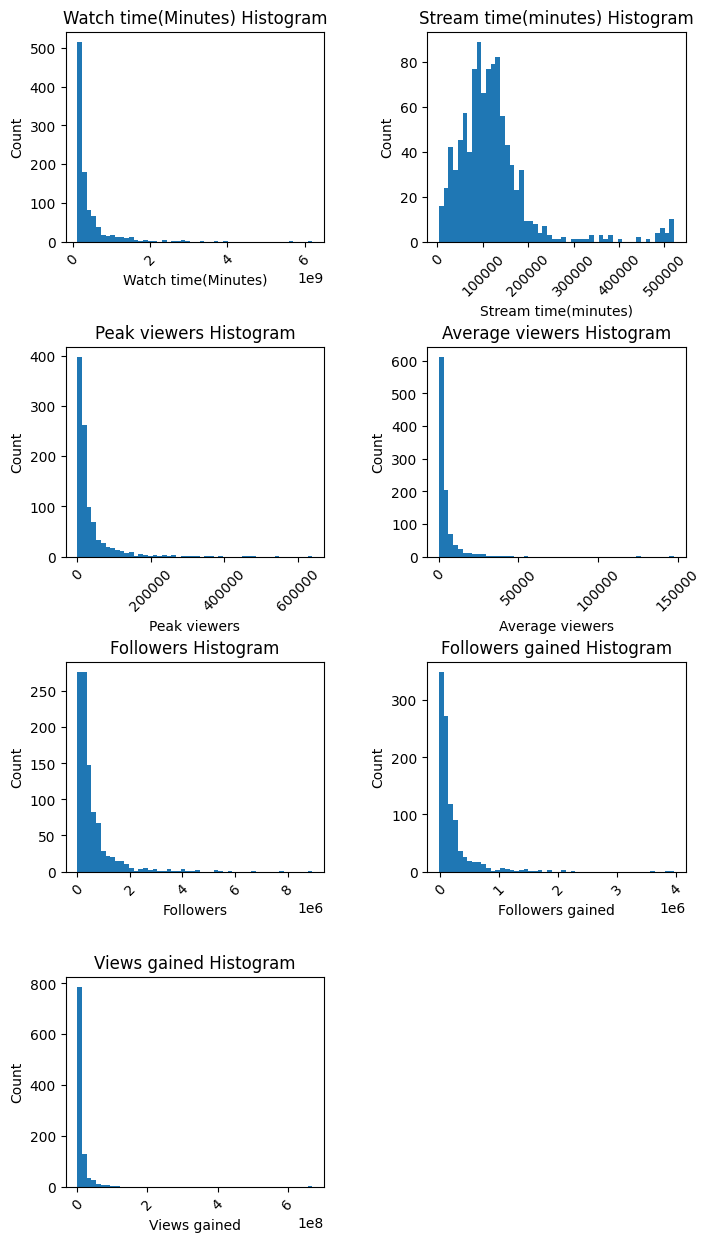

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    ax[y][x].hist(data[col], bins=50)

    ax[y][x].set_title(col + " Histogram")
    ax[y][x].set_ylabel("Count")
    ax[y][x].set_xlabel(col)
    ax[y][x].tick_params(axis='x', rotation=45)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

It's pretty clear most of these have severe outliers.

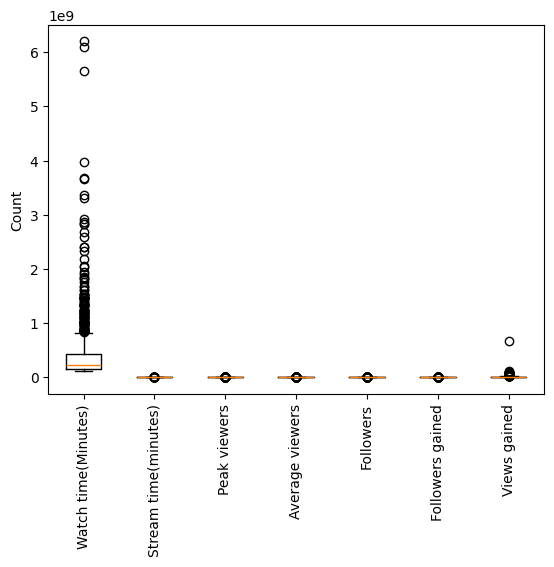

In [5]:
fix, ax = plt.subplots()
ax.boxplot(data[numeric], tick_labels=data[numeric].columns)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Count")
plt.show()

Watch time makes the other box plots impossible to see. Let's just look at them individually

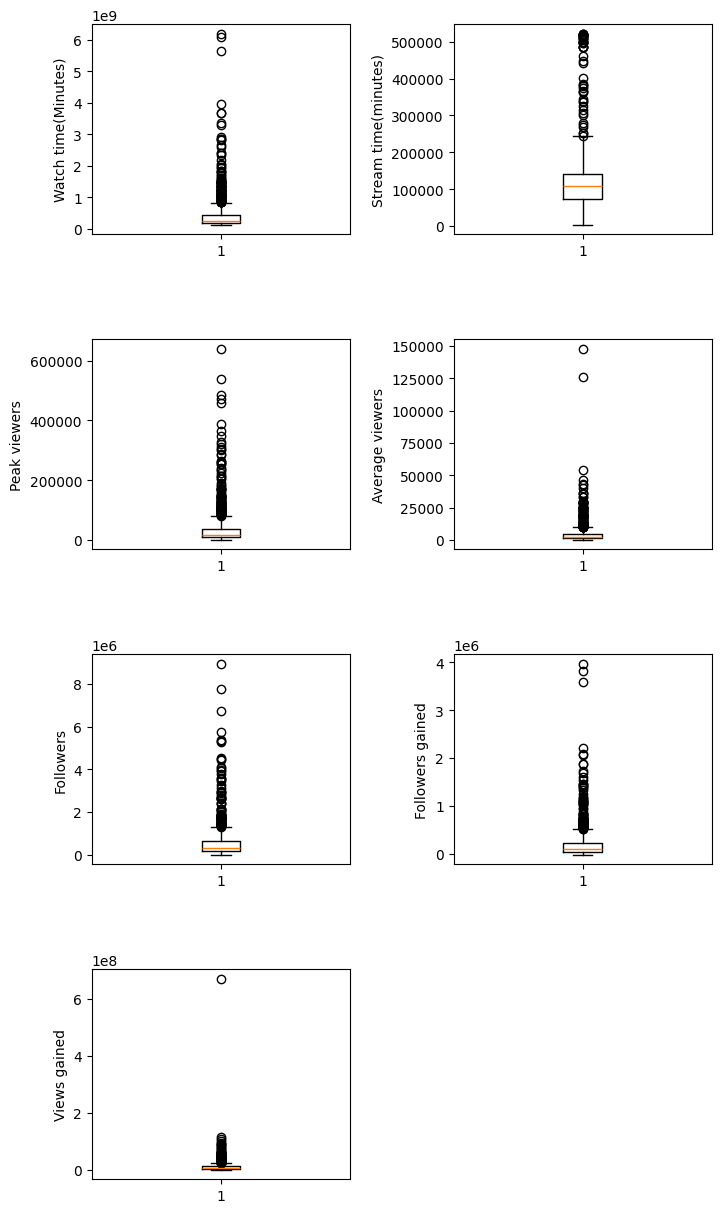

In [90]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    ax[y][x].boxplot(data[col])
    ax[y][x].set_ylabel(col)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

It's clear that not only are there a lot of outliers, but they are extremely large numbers compared to the interquartile. Let's see what the distributions look like without the upper 75%. The lower 25% seems to be fine, but we need to graph it to see.

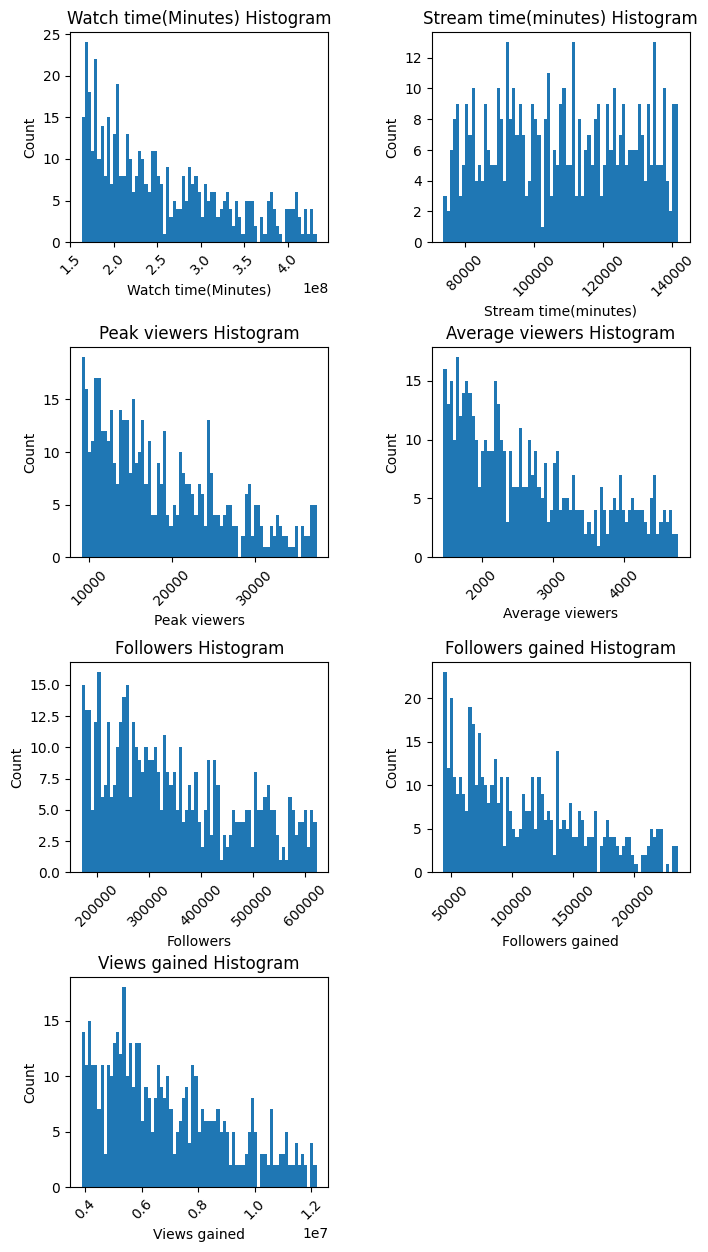

In [108]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    upper = data[col].quantile(0.75)
    lower = data[col].quantile(0.25)

    inner = data[(upper >= data[col]) & (data[col] >= lower)]
    ax[y][x].hist(inner[col], bins=75)

    ax[y][x].set_title(col + " Histogram")
    ax[y][x].set_ylabel("Count")
    ax[y][x].set_xlabel(col)
    ax[y][x].tick_params(axis='x', rotation=45)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

Streamtime being flat seems very interesting. It appears to be independent of channel size.

Let's only remove the 75 quantile next:

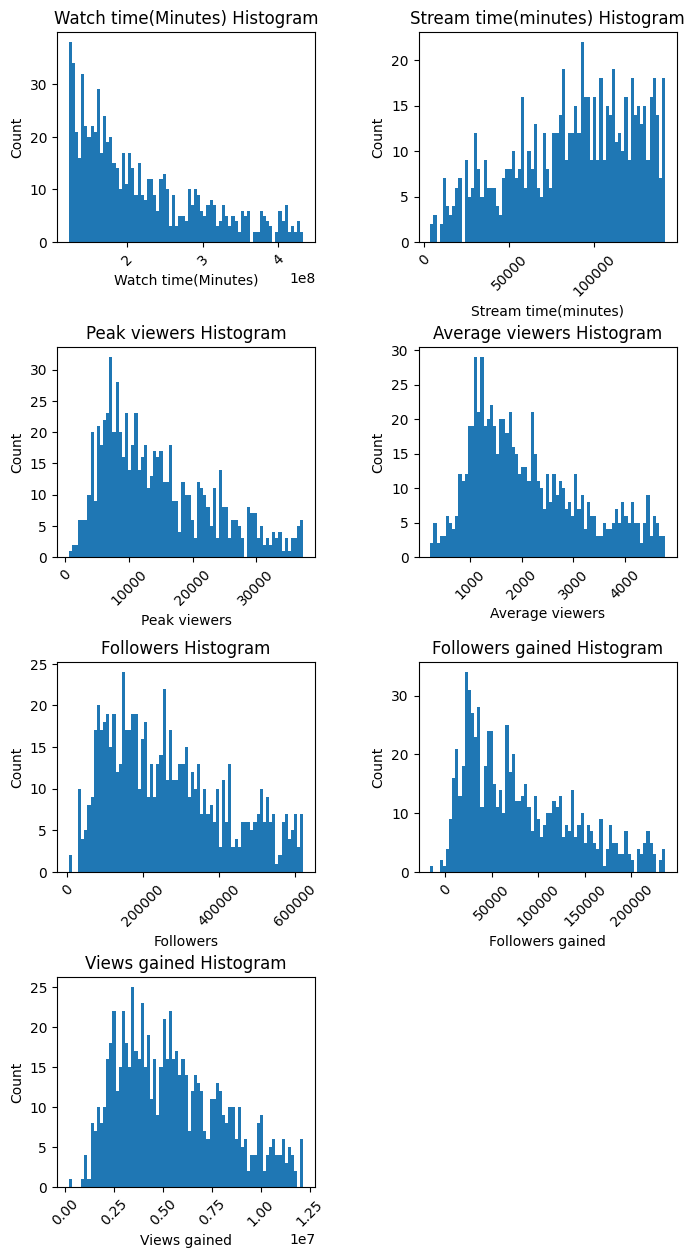

In [107]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    upper = data[col].quantile(0.75)
    lower = data[col].quantile(0.25)

    inner = data[upper >= data[col]]
    ax[y][x].hist(inner[col], bins=75)

    ax[y][x].set_title(col + " Histogram")
    ax[y][x].set_ylabel("Count")
    ax[y][x].set_xlabel(col)
    ax[y][x].tick_params(axis='x', rotation=45)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

The count decreasing the metric increases makes sense. There are naturally less large channels than there are small ones. It is hard to say for sure why the 25th quantile is less, but one guess is that the dataset is not representative of the entire twitch userbase. Therefore, if it only includes "larger" channels, then it would make sense fewer channels in the dataset would be represent the lower end of follower and viewer counts.

In [124]:
for col in numeric:
    print(f"Data on {col}:")
    print(f"Mean: {data[col].mean()}")
    print(f"Median: {data[col].median()}")
    print(f"Min: {data[col].min()}")
    print(f"Max: {data[col].max()}")
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    inner = data[(upper < data[col]) | (data[col] < lower)]
    print(f"Number of outliers: {inner[col].count()}/{data[col].count()}")

    print('\n')

Data on Watch time(Minutes):
Mean: 418427930.13
Median: 234990787.5
Min: 122192850
Max: 6196161750
Number of outliers: 107/1000


Data on Stream time(minutes):
Mean: 120515.16
Median: 108240.0
Min: 3465
Max: 521445
Number of outliers: 48/1000


Data on Peak viewers:
Mean: 37065.051
Median: 16676.0
Min: 496
Max: 639375
Number of outliers: 113/1000


Data on Average viewers:
Mean: 4781.04
Median: 2425.0
Min: 235
Max: 147643
Number of outliers: 100/1000


Data on Followers:
Mean: 570054.068
Median: 318063.0
Min: 3660
Max: 8938903
Number of outliers: 89/1000


Data on Followers gained:
Mean: 205518.534
Median: 98352.0
Min: -15772
Max: 3966525
Number of outliers: 90/1000


Data on Views gained:
Mean: 11668165.613
Median: 6456323.5
Min: 175788
Max: 670137548
Number of outliers: 91/1000




### Pairwise relational scatterplots:

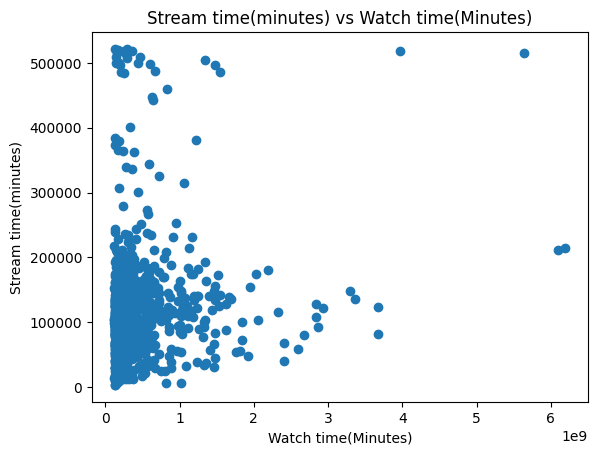

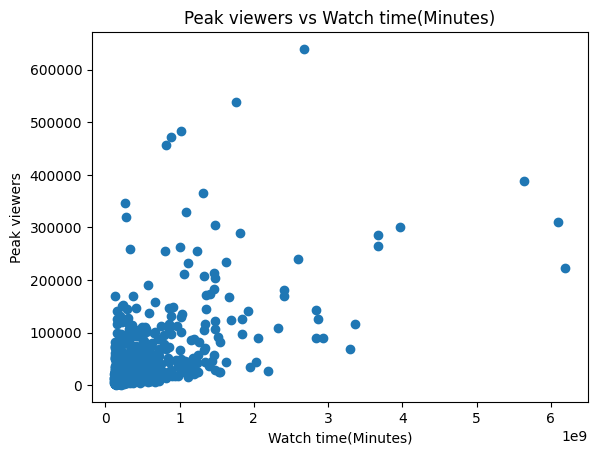

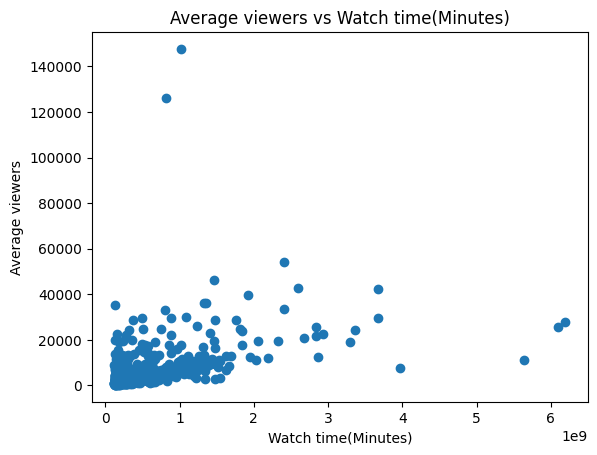

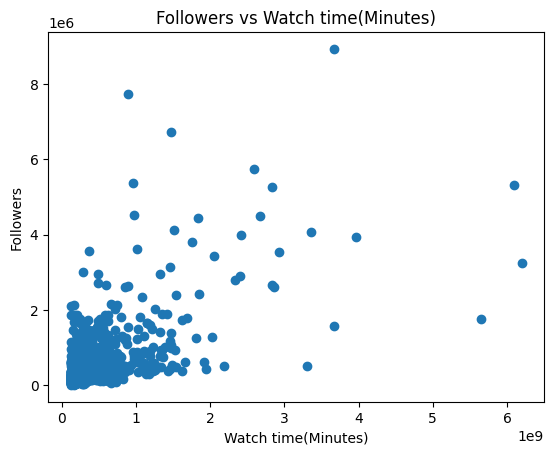

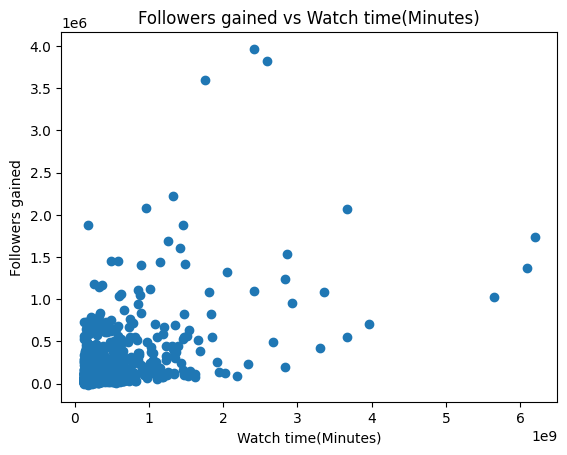

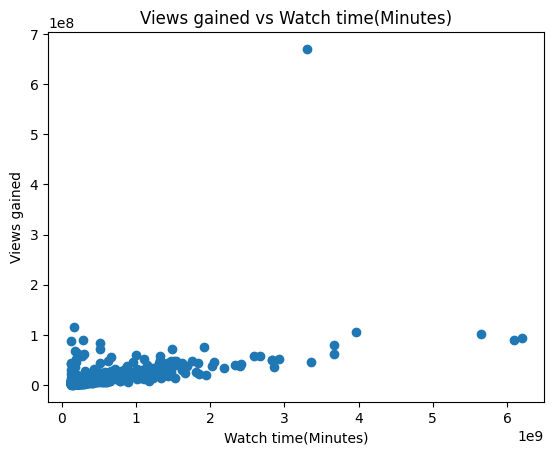

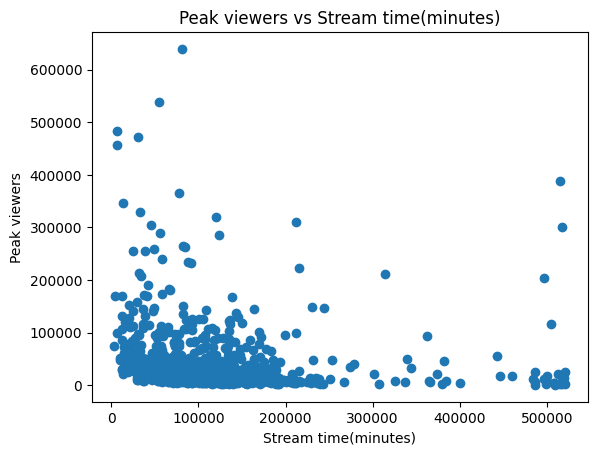

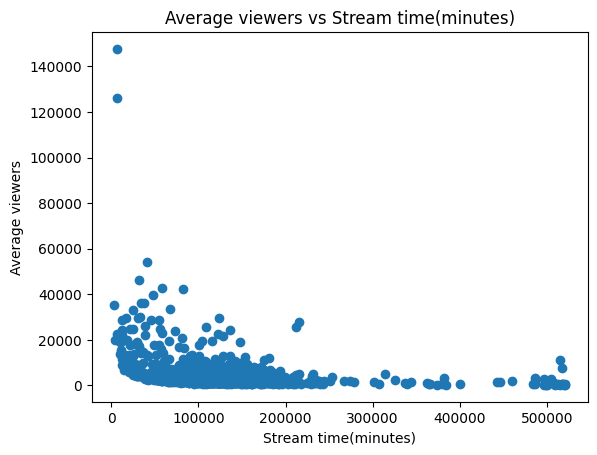

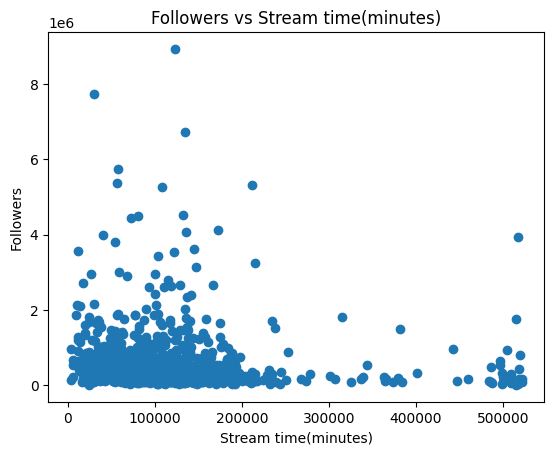

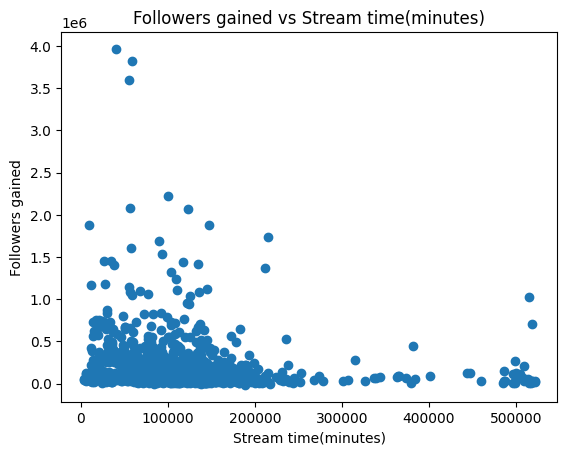

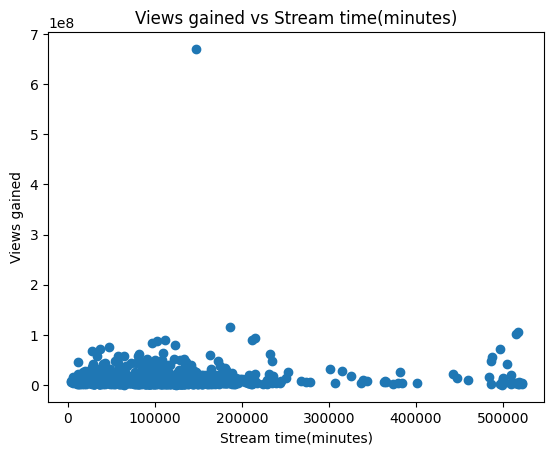

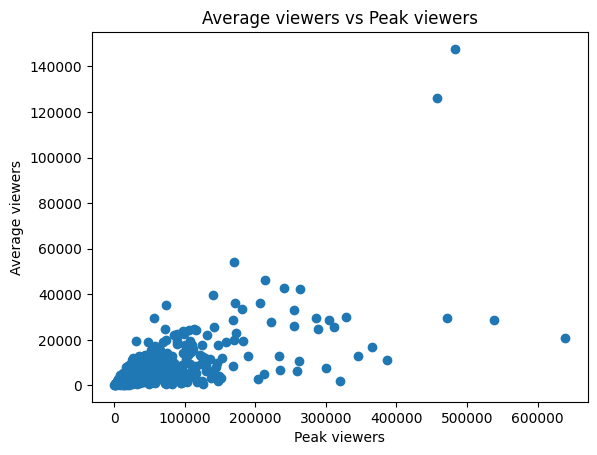

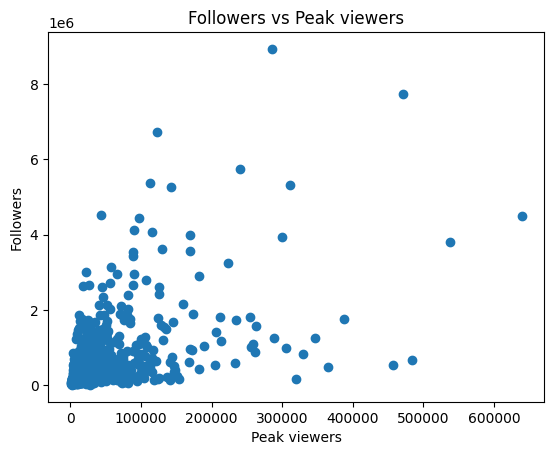

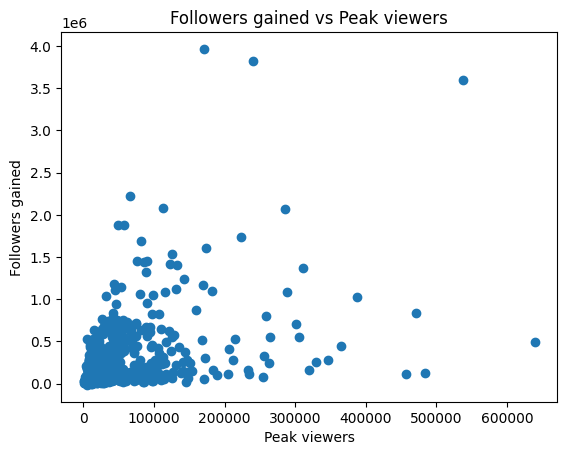

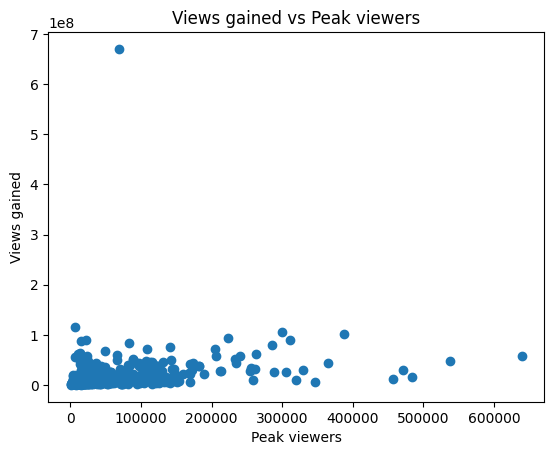

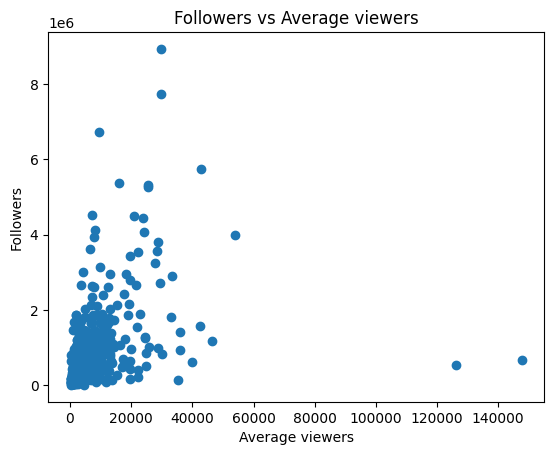

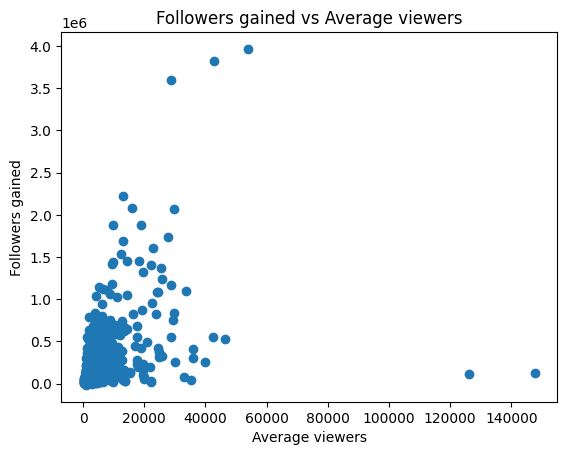

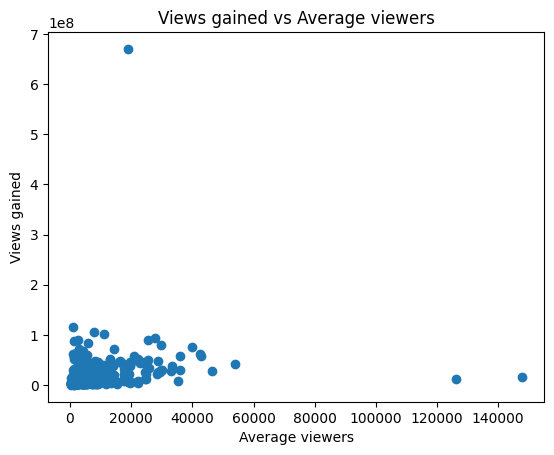

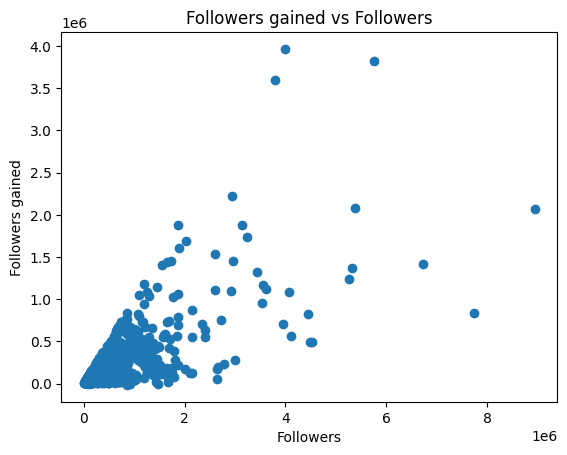

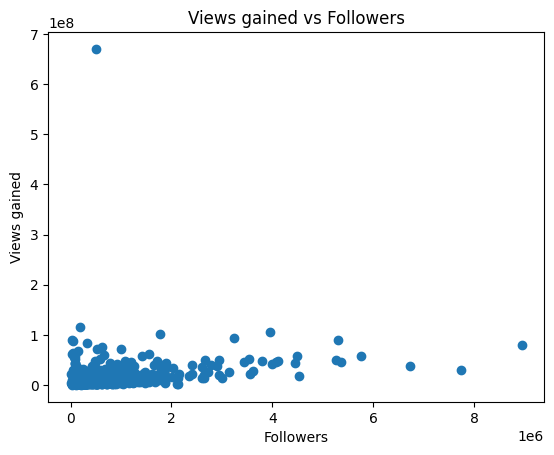

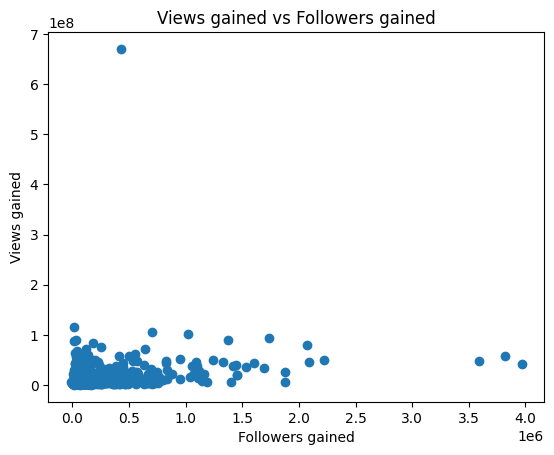

In [133]:
length = len(numeric)
for i in range(length):
    x = numeric[i]
    for j in range(i+1, length):
        y = numeric[j]
        plt.scatter(data[x], data[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"{y} vs {x}")

        plt.show()

It's hard to see the relationships, so let's use corr.

In [134]:
data.corr(numeric_only=True)

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000


It looks like there is a positive correlation between followers and followers gained, which makes sense as the latter leads to an increase in the former. Followership and viewshgip are also correlated with watch time, which also makes sense. The larger number of people following, the more watch time a channel would accumulate.

# Categoric

For categoric, we can try crosstab and heatmaps.

In [147]:
print(categoric)

['Partnered', 'Mature', 'Language']


In [170]:
pd.set_option('display.max_columns', None)
tabs = []
length = len(categoric)
for i in range(length):
    x = categoric[i]
    for j in range(i+1, length):
        y = categoric[j]
        res = pd.crosstab(data[x], data[y])
        tabs.append(res)
        
        print(res)

Mature     False  True 
Partnered              
False         17      5
True         753    225
Language   Arabic  Chinese  Czech  English  Finnish  French  German  Greek  \
Partnered                                                                    
False           0        0      0        9        0       1       1      0   
True            5       30      6      476        1      65      48      1   

Language   Hungarian  Italian  Japanese  Korean  Other  Polish  Portuguese  \
Partnered                                                                    
False              0        0         0       1      1       0           1   
True               2       17        10      76      0      12          60   

Language   Russian  Slovak  Spanish  Swedish  Thai  Turkish  
Partnered                                                    
False            7       0        1        0     0        0  
True            67       1       67        1    11       22  
Language  Arabic  Chinese  Cze

It's clear that this dataset is not representative of unpartnered channels, as it is vastly partnered.

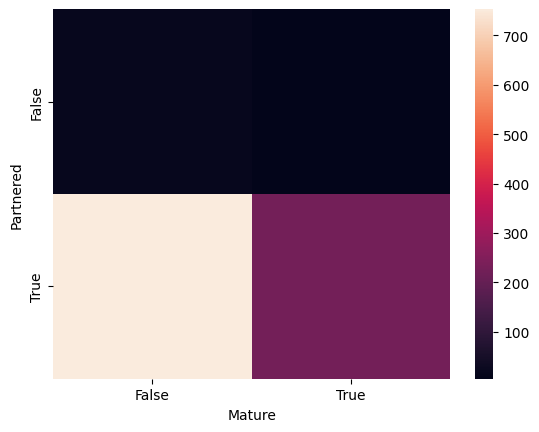

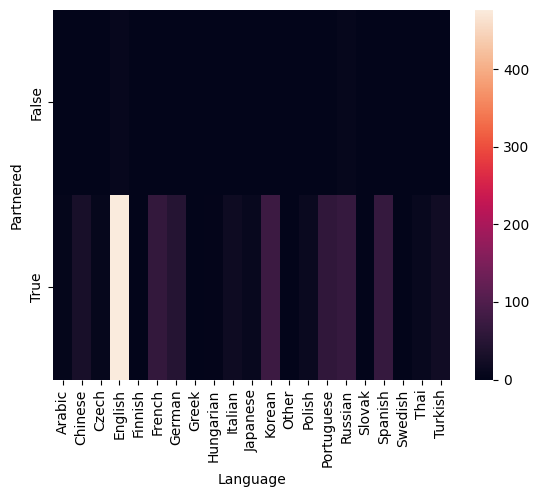

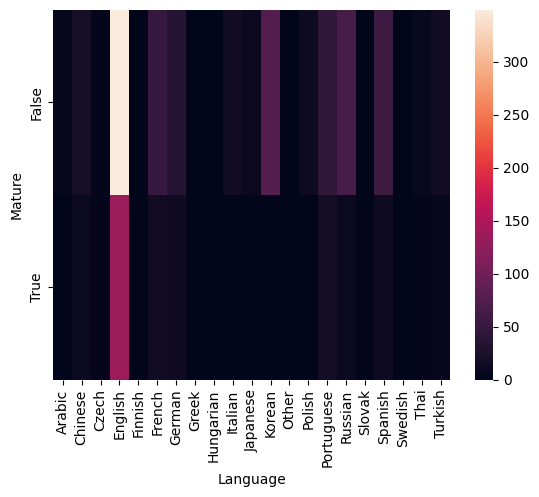

In [171]:
for tab in tabs:
    sns.heatmap(tab)
    plt.show()

Aggregate

In [182]:
for col in categoric:
    for val in numeric:
        res = data.groupby(col)[val].agg(['sum', 'mean', 'median', 'min', 'max'])
        print(f"Looking at {val}:")
        print(res)
        print('\n')

Looking at Watch time(Minutes):
                    sum          mean       median        min         max
Partnered                                                                
False        6122503935  2.782956e+08  180062310.0  123365895  1435735725
True       412305426195  4.215802e+08  235279335.0  122192850  6196161750


Looking at Stream time(minutes):
                 sum           mean    median   min     max
Partnered                                                  
False        2739870  124539.545455   63007.5  3465  517980
True       117775290  120424.631902  108495.0  3645  521445


Looking at Peak viewers:
                sum          mean   median   min     max
Partnered                                               
False        566846  25765.727273  21304.0  1803   74195
True       36498205  37319.228016  16590.5   496  639375


Looking at Average viewers:
               sum         mean  median  min     max
Partnered                                           
False 

Relationship between categorical data and numeric:

(Scatterplot with hues, color being the category)

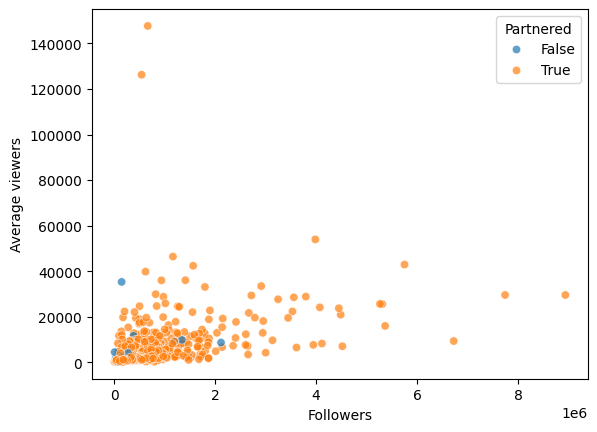

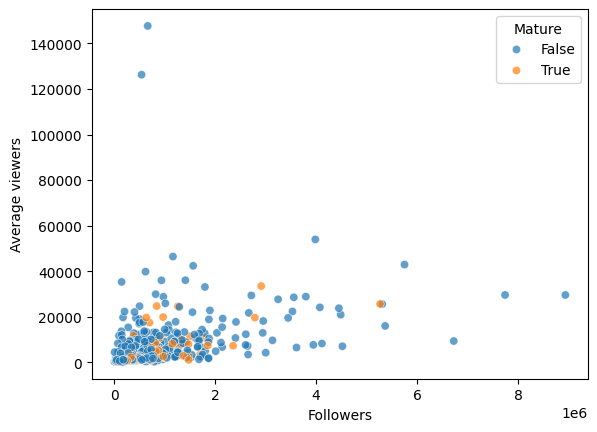

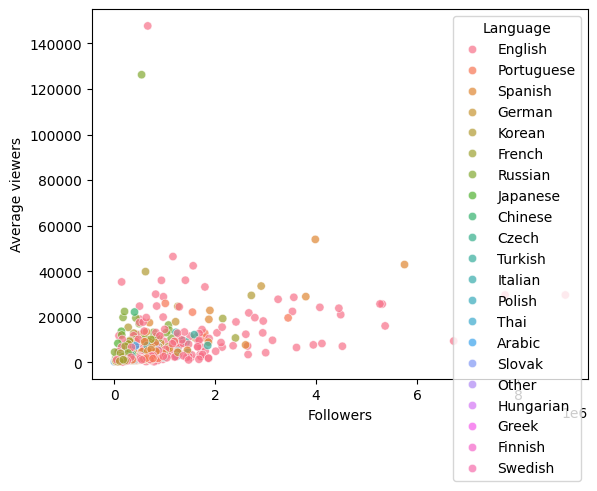

In [185]:
for col in categoric:
    sns.scatterplot(data, x='Followers', y='Average viewers', hue=col, alpha=0.7)
    
    #plt.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Surprisingly, there doesn't seem to be much correlation. Or at least, it's hard to tell, given that the data is very close together and seemingly all over. Although, given that other languages are rarer than English on Twitch, they are visibly on the lower end of the followers graph.